In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow import keras
import seaborn as sns

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
data=pd.read_csv("stock.csv",index_col='Date',parse_dates=True)

In [4]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
data.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [45]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB
None


In [46]:
print(data.describe())

              Open         High          Low         Last       Close  \
count  2035.000000  2035.000000  2035.000000  2035.000000  2035.00000   
mean    149.713735   151.992826   147.293931   149.474251   149.45027   
std      48.664509    49.413109    47.931958    48.732570    48.71204   
min      81.100000    82.800000    80.000000    81.000000    80.95000   
25%     120.025000   122.100000   118.300000   120.075000   120.05000   
50%     141.500000   143.400000   139.600000   141.100000   141.25000   
75%     157.175000   159.400000   155.150000   156.925000   156.90000   
max     327.700000   328.750000   321.650000   325.950000   325.75000   

       Total Trade Quantity  Turnover (Lacs)  
count          2.035000e+03      2035.000000  
mean           2.335681e+06      3899.980565  
std            2.091778e+06      4570.767877  
min            3.961000e+04        37.040000  
25%            1.146444e+06      1427.460000  
50%            1.783456e+06      2512.030000  
75%          

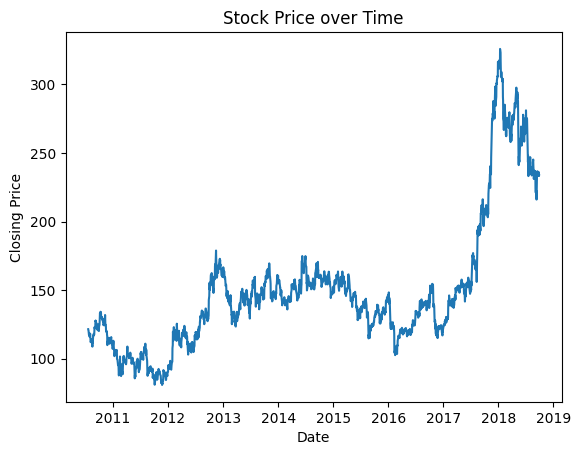

In [48]:
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price over Time')
plt.show()

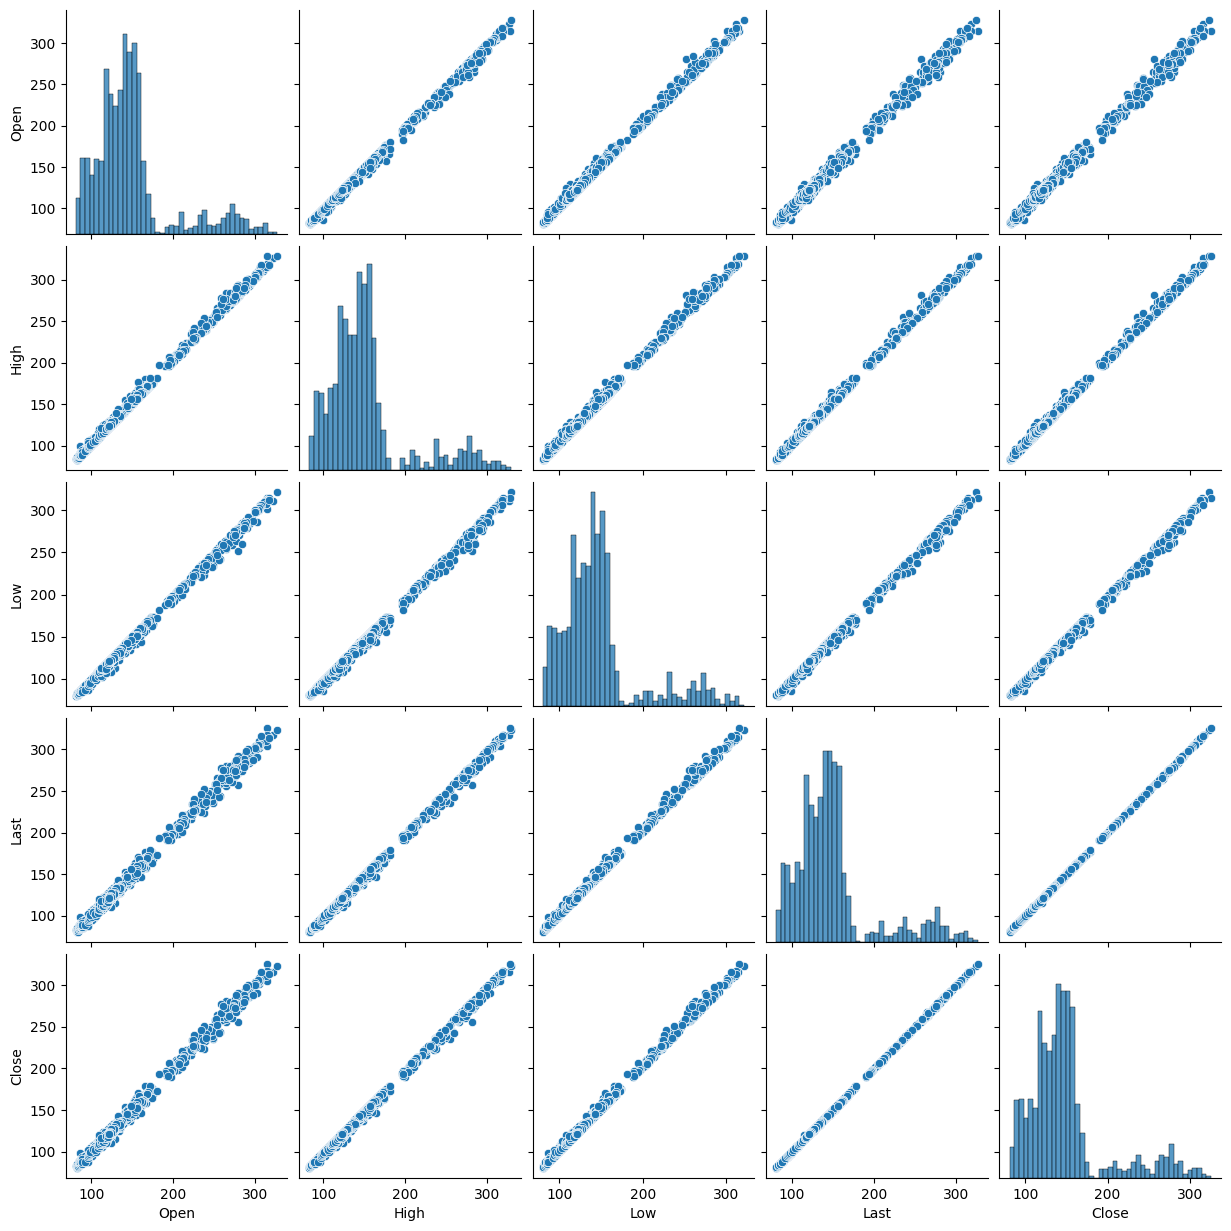

In [51]:
sns.pairplot(data[['Open', 'High', 'Low', 'Last', 'Close']])
plt.show()

In [52]:
print(data.corr())

                          Open      High       Low      Last     Close  \
Open                  1.000000  0.999015  0.998825  0.997781  0.997840   
High                  0.999015  1.000000  0.998773  0.999155  0.999194   
Low                   0.998825  0.998773  1.000000  0.999051  0.999119   
Last                  0.997781  0.999155  0.999051  1.000000  0.999961   
Close                 0.997840  0.999194  0.999119  0.999961  1.000000   
Total Trade Quantity  0.385951  0.406405  0.380621  0.399328  0.398911   
Turnover (Lacs)       0.612877  0.630589  0.608502  0.624584  0.624213   

                      Total Trade Quantity  Turnover (Lacs)  
Open                              0.385951         0.612877  
High                              0.406405         0.630589  
Low                               0.380621         0.608502  
Last                              0.399328         0.624584  
Close                             0.398911         0.624213  
Total Trade Quantity              1

<Axes: xlabel='Date'>

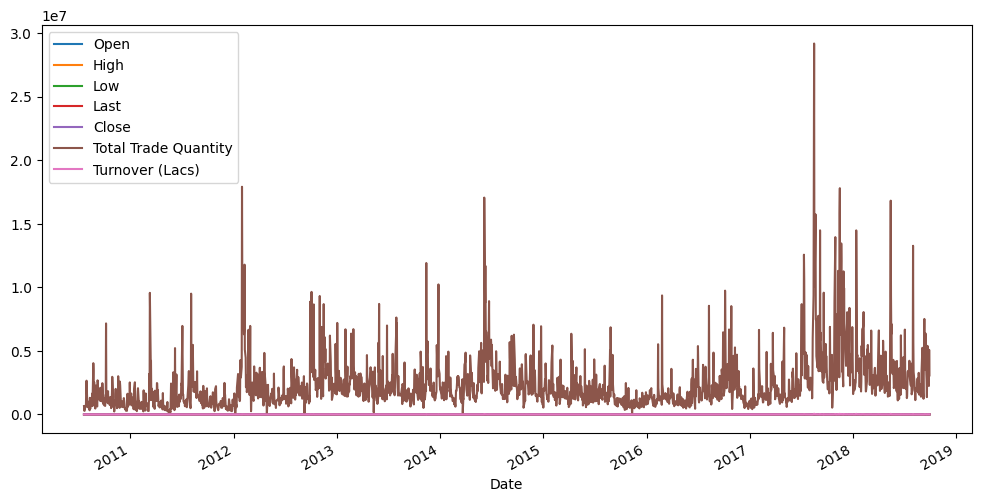

In [7]:
data.plot(figsize=(12,6))

In [9]:
data.shape

(2035, 7)

In [26]:
y=data['Turnover (Lacs)']
x=data.iloc[:,:-1]
x

,Open,High,Low,Last,Close,Total Trade Quantity
Date,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509
...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312


In [30]:
scalerx=MinMaxScaler()
scalerx.fit(x)
scaledx=scalerx.transform(x)

In [32]:
scalery=MinMaxScaler()
scalery.fit(data)
scaledy=scalery.transform(data)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaledx, scaledy, test_size=0.2, random_state=42)


In [38]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [41]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(1, 6)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [42]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
51/51 [==============================] - 5s 6ms/step - loss: 0.0376 - mse: 0.0376
Epoch 2/100
51/51 [==============================] - 0s 6ms/step - loss: 0.0170 - mse: 0.0170
Epoch 3/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0159 - mse: 0.0159
Epoch 4/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0158 - mse: 0.0158
Epoch 5/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0157 - mse: 0.0157
Epoch 6/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0156 - mse: 0.0156
Epoch 7/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0155 - mse: 0.0155
Epoch 8/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0154 - mse: 0.0154
Epoch 9/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0155 - mse: 0.0155
Epoch 10/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0153 - mse: 0.0153
Epoch 11/100
51/51 [==============================] - 0s 6m

In [44]:
loss, mse = model.evaluate(X_test, y_test)
print(f"Loss of Model is {loss}")
print(f"MSE of Model is {mse}")

13/13 [==============================] - 0s 3ms/step - loss: 0.0149 - mse: 0.0149
Loss of Model is 0.014867055229842663
MSE of Model is 0.014867055229842663
